<a href="https://colab.research.google.com/github/fxrdhan/Machine-Learning-Project/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Firdaus_Arif_Ramadhani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Dataset Introduction**

**Air Quality Measurements Dataset**

1.  Description

    This dataset contains detailed air quality measurements collected over a specified period. It focuses on various pollutants, providing a comprehensive overview of air quality metrics.

2. Feature	Description

  - Date: The date of the measurement.
  - Time: The time of the measurement.
  - CO(GT): Concentration of carbon monoxide (CO) in the air (µg/m³).
  - PT08.S1(CO):	Sensor measurement for CO concentration.
  - NMHC(GT):	Concentration of non-methane hydrocarbons (NMHC) (µg/m³).
  - C6H6(GT):	Concentration of benzene (C6H6) in the air (µg/m³).
  - PT08.S2(NMHC):	Sensor measurement for NMHC concentration.
  - NOx(GT):	Concentration of nitrogen oxides (NOx) in the air (µg/m³).
  - PT08.S3(NOx):	Sensor measurement for NOx concentration.
  - NO2(GT):	Concentration of nitrogen dioxide (NO2) in the air (µg/m³).

3. Total Rows: 9357
4. Source: [Kaggle](https://www.kaggle.com/datasets/dakshbhalala/uci-air-quality-dataset/data)

# **2. Import Library**

In [5]:
!python --version

Python 3.10.12


In [6]:
!pip install pandas numpy matplotlib seaborn plotly scikit-learn yellowbrick scipy

In [7]:
# System and Settings
import time
import warnings
warnings.filterwarnings('ignore')

# Core Data Processing Libraries
import numpy as np
import pandas as pd
# Configure pandas display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning
## Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

## Clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

## Dimensionality Reduction
from sklearn.decomposition import PCA

## Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

# Statistical Analysis
from scipy import stats
from scipy.stats.mstats import winsorize
from scipy.spatial.distance import cdist

# **3. Import Dataset**

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AirQualityUCI.csv")

In [10]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,3/10/2004,18:00:00,2.600,1360.000,150.000,11.900,1046.000,166.000,1056.000,113.000,1692.000,1268.000,13.600,48.900,0.758,NaN,NaN
1,3/10/2004,19:00:00,2.000,1292.000,112.000,9.400,955.000,103.000,1174.000,92.000,1559.000,972.000,13.300,47.700,0.726,NaN,NaN
2,3/10/2004,20:00:00,2.200,1402.000,88.000,9.000,939.000,131.000,1140.000,114.000,1555.000,1074.000,11.900,54.000,0.750,NaN,NaN
3,3/10/2004,21:00:00,2.200,1376.000,80.000,9.200,948.000,172.000,1092.000,122.000,1584.000,1203.000,11.000,60.000,0.787,NaN,NaN
4,3/10/2004,22:00:00,1.600,1272.000,51.000,6.500,836.000,131.000,1205.000,116.000,1490.000,1110.000,11.200,59.600,0.789,NaN,NaN


# **4. Exploratory Data Analysis (EDA)**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [12]:
df.sample(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
6736,12/16/2004,10:00:00,4.600,-200.000,-200.000,-200.000,-200.000,849.000,-200.000,161.000,-200.000,-200.000,-200.000,-200.000,-200.000,NaN,NaN
2151,6/8/2004,9:00:00,5.000,1346.000,-200.000,27.100,1481.000,441.000,602.000,174.000,2367.000,1681.000,23.900,44.400,1.303,NaN,NaN
3581,8/6/2004,23:00:00,1.800,1039.000,-200.000,10.400,991.000,93.000,685.000,74.000,1820.000,1088.000,24.100,63.500,1.883,NaN,NaN
1600,5/16/2004,10:00:00,2.000,1053.000,-200.000,9.800,970.000,138.000,930.000,105.000,1473.000,991.000,25.500,21.100,0.677,NaN,NaN
8132,2/12/2005,14:00:00,3.800,1570.000,-200.000,17.500,1224.000,575.000,468.000,216.000,1448.000,2020.000,11.000,51.400,0.675,NaN,NaN


In [13]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,9357.000,0.000,0.000
mean,-34.208,1048.990,-159.090,1.866,894.595,168.617,794.990,58.149,1391.480,975.072,9.778,39.485,-6.838,NaN,NaN
std,77.657,329.833,139.789,41.380,342.333,257.434,321.994,126.940,467.210,456.938,43.204,51.216,38.977,NaN,NaN
min,-200.000,-200.000,-200.000,-200.000,-200.000,-200.000,-200.000,-200.000,-200.000,-200.000,-200.000,-200.000,-200.000,NaN,NaN
25%,0.600,921.000,-200.000,4.000,711.000,50.000,637.000,53.000,1185.000,700.000,10.900,34.100,0.692,NaN,NaN
50%,1.500,1053.000,-200.000,7.900,895.000,141.000,794.000,96.000,1446.000,942.000,17.200,48.600,0.977,NaN,NaN
75%,2.600,1221.000,-200.000,13.600,1105.000,284.000,960.000,133.000,1662.000,1255.000,24.100,61.900,1.296,NaN,NaN
max,11.900,2040.000,1189.000,63.700,2214.000,1479.000,2683.000,340.000,2775.000,2523.000,44.600,88.700,2.231,NaN,NaN


In [14]:
# Remove Missing Attribute Values (-200)
df = df[(df != -200).all(axis=1)]

In [15]:
df.isnull().sum()

,0
Date,114
Time,114
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114


In [16]:
df.duplicated().sum()

113

In [17]:
df = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)

In [18]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.columns.tolist()

['CO(GT)',
 'PT08.S1(CO)',
 'NMHC(GT)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'NOx(GT)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH']

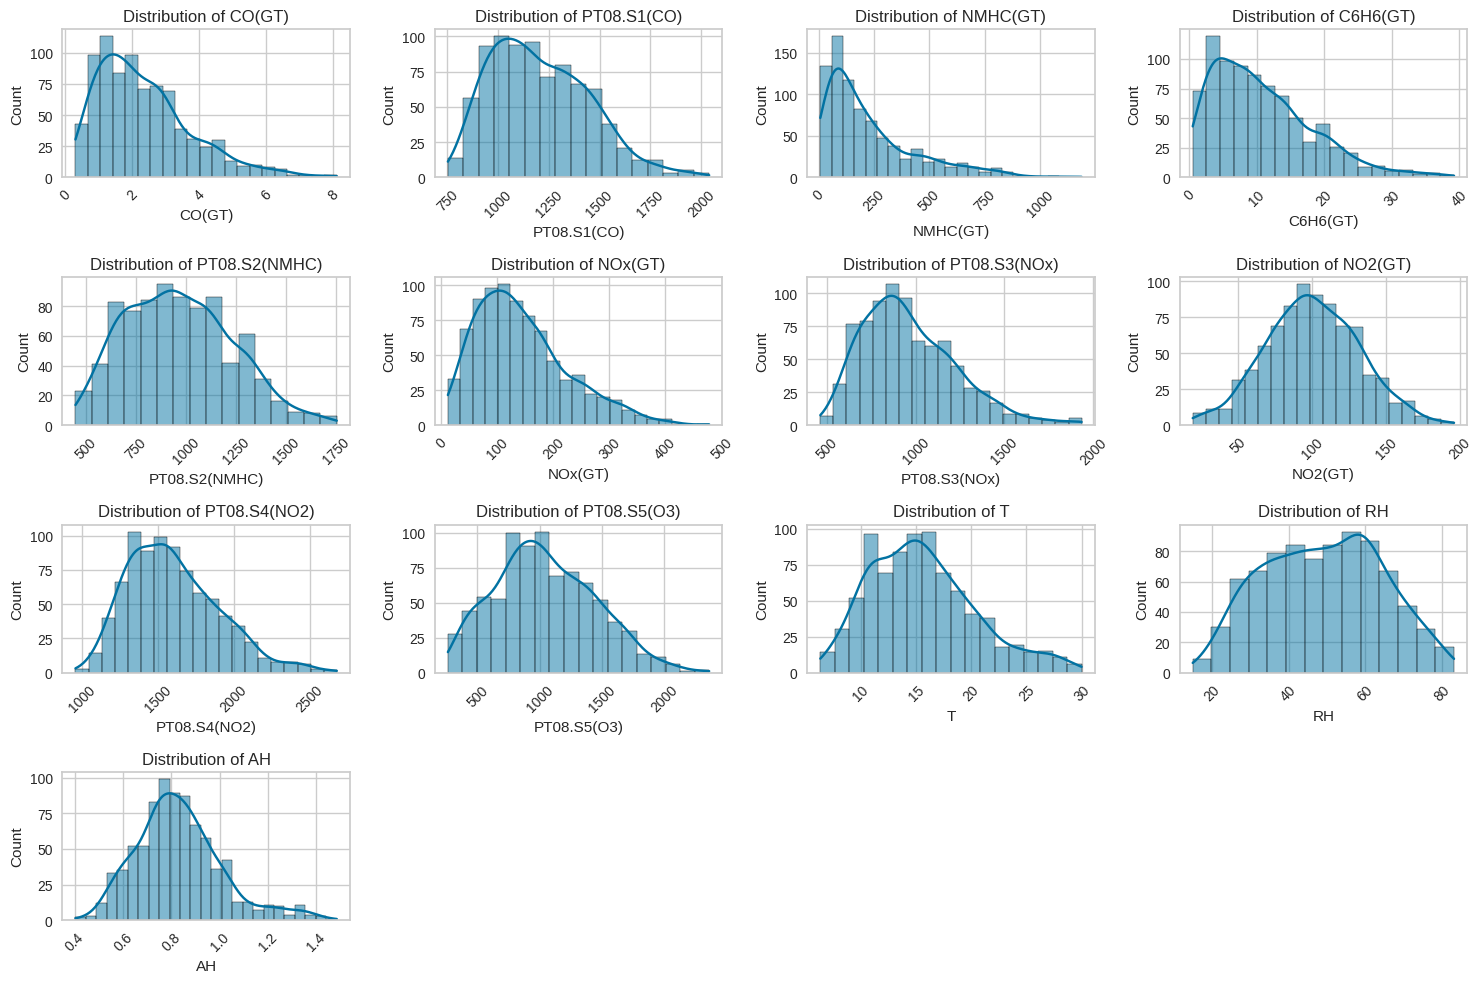

In [19]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_df, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
- Most features show a right-skewed distribution.
- Features like T (Temperature), RH (Relative Humidity), and AH (Absolute Humidity) show a more symmetric distribution.

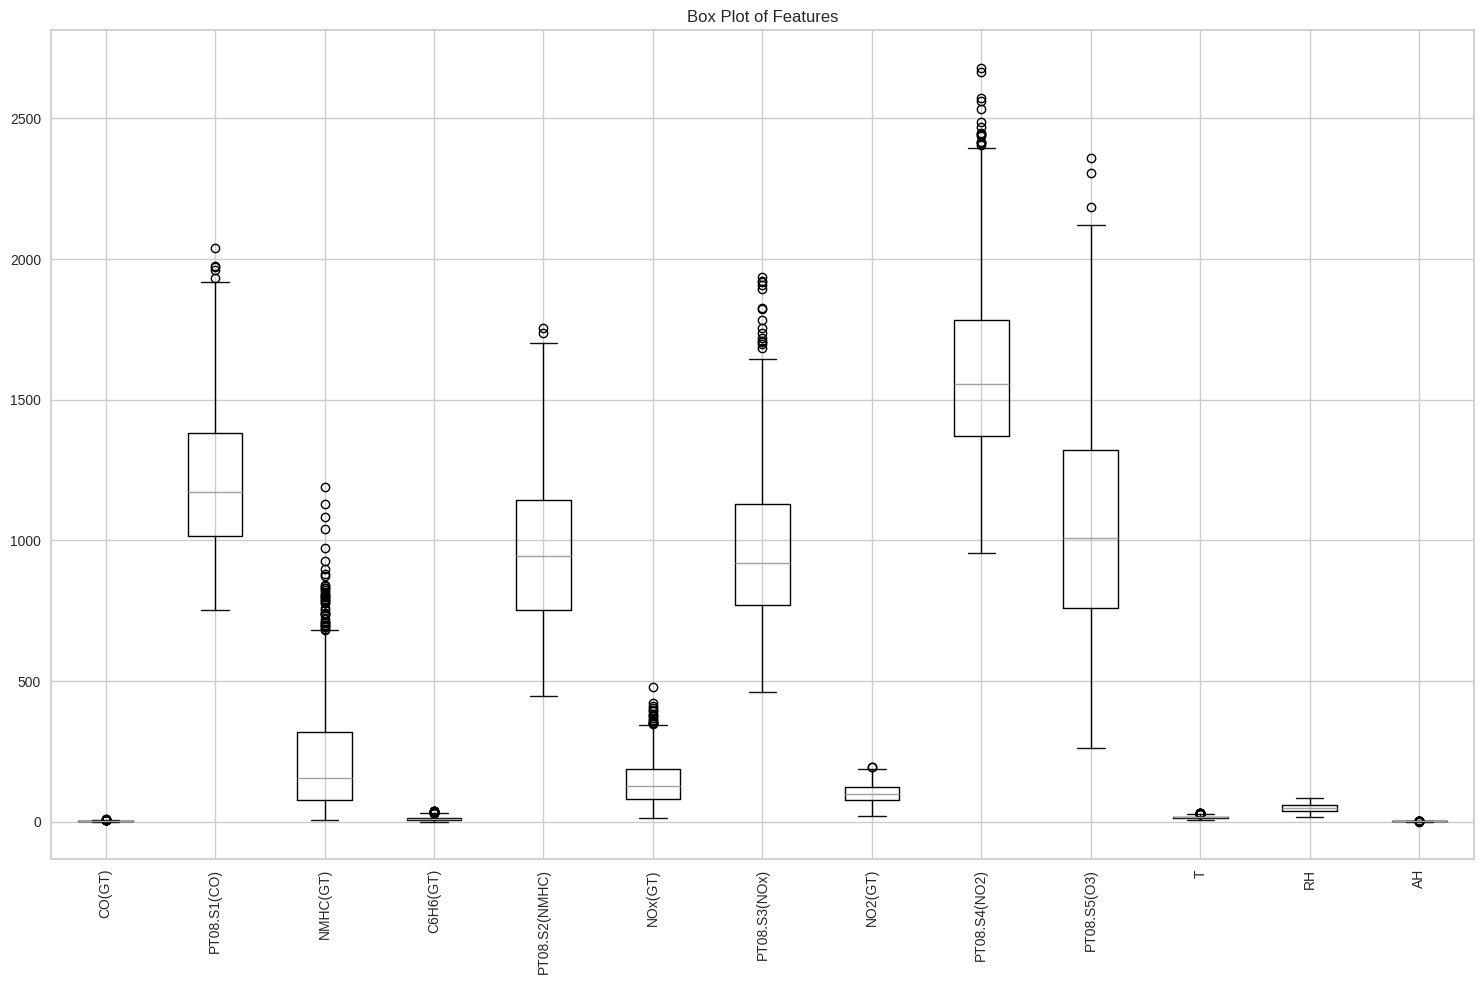

In [20]:
plt.figure(figsize=(15, 10))
df.boxplot()
plt.xticks(rotation=90)
plt.title('Box Plot of Features')
plt.tight_layout()
plt.show()

**Insight:**
- Several features, such as NMHC(GT) and NOx(GT), have significant outliers that are far from the interquartile range (IQR).
- Features like C6H6(GT) and CO(GT) have a wide spread, indicating substantial variability in the data.

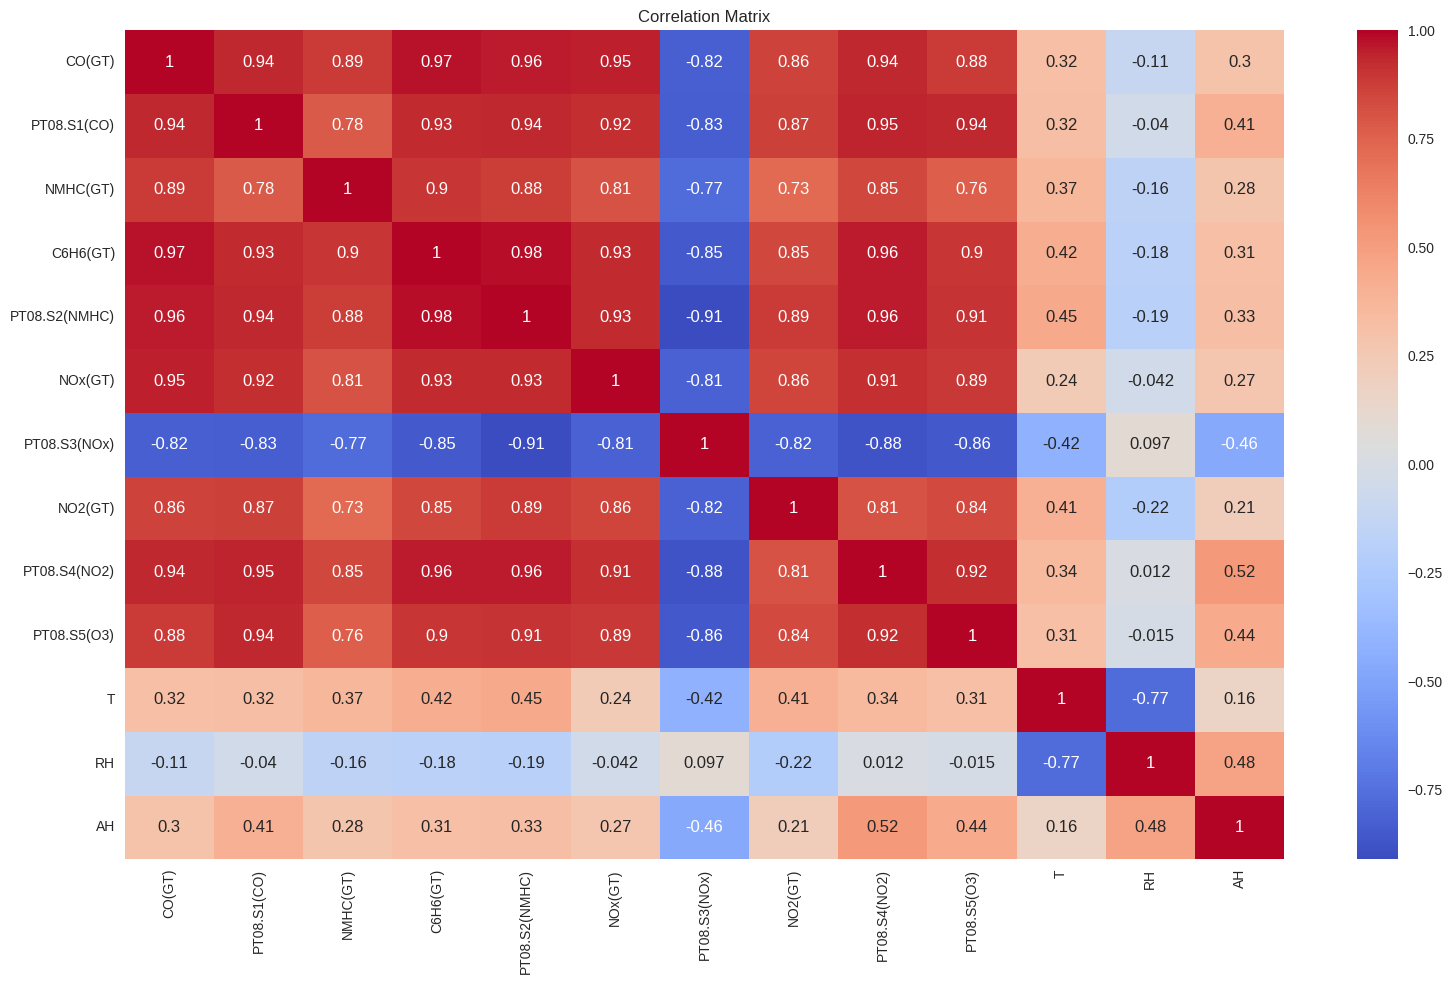

In [21]:
plt.figure(figsize=(16, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

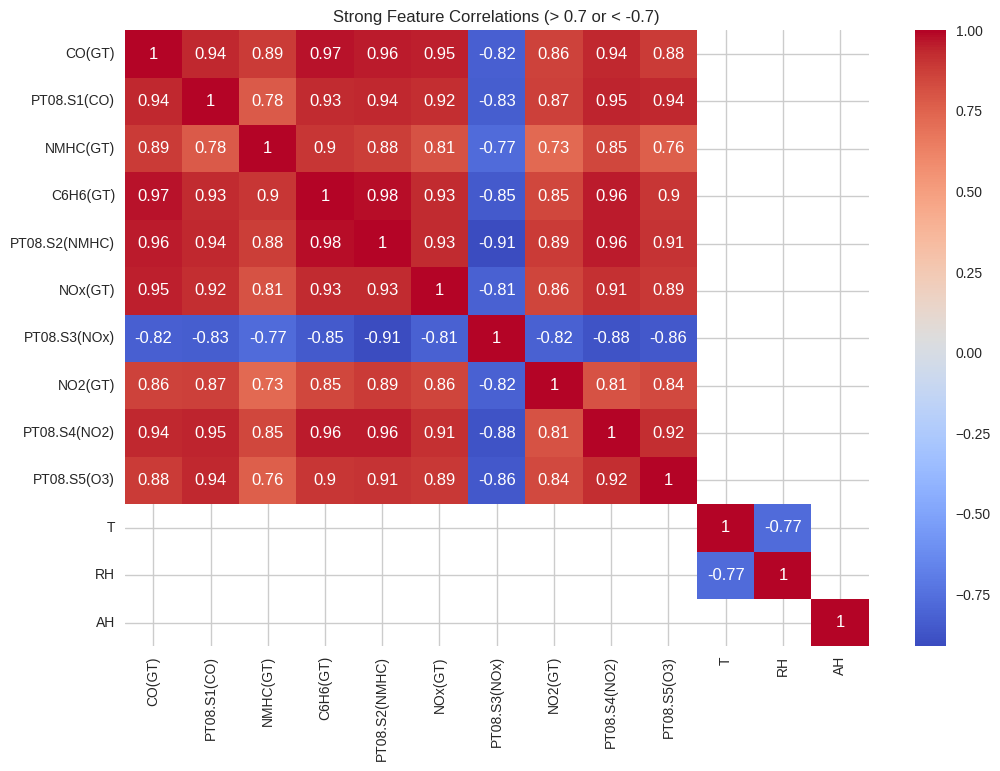

In [22]:
# Filter for strong correlations
correlation_matrix = numeric_df.corr()
strong_corr = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]

plt.figure(figsize=(12, 8))
sns.heatmap(strong_corr, annot=True, cmap='coolwarm', cbar=True)
plt.title('Strong Feature Correlations (> 0.7 or < -0.7)')
plt.show()

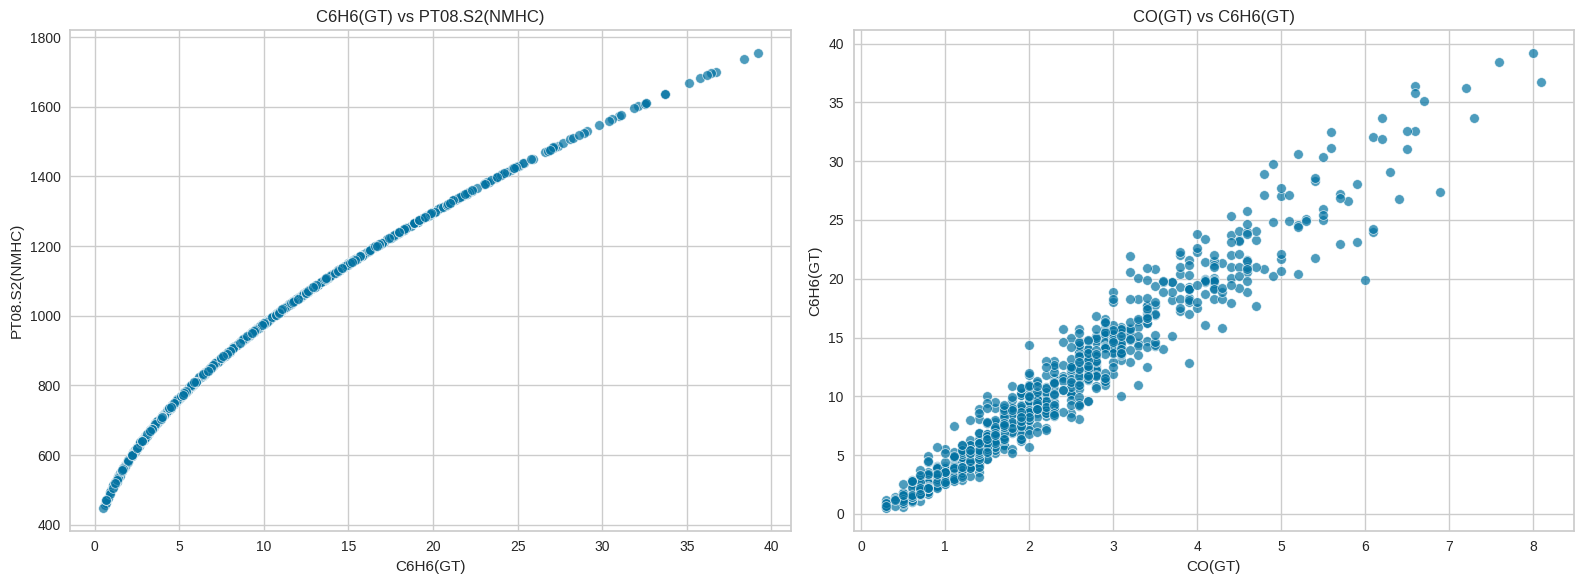

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# C6H6(GT) vs PT08.S2(NMHC)
sns.scatterplot(ax=axes[0], x='C6H6(GT)', y='PT08.S2(NMHC)', data=df, alpha=0.7)
axes[0].set_title('C6H6(GT) vs PT08.S2(NMHC)')
axes[0].set_xlabel('C6H6(GT)')
axes[0].set_ylabel('PT08.S2(NMHC)')

# CO(GT) vs C6H6(GT)
sns.scatterplot(ax=axes[1], x='CO(GT)', y='C6H6(GT)', data=df, alpha=0.7)
axes[1].set_title('CO(GT) vs C6H6(GT)')
axes[1].set_xlabel('CO(GT)')
axes[1].set_ylabel('C6H6(GT)')

plt.tight_layout()
plt.show()

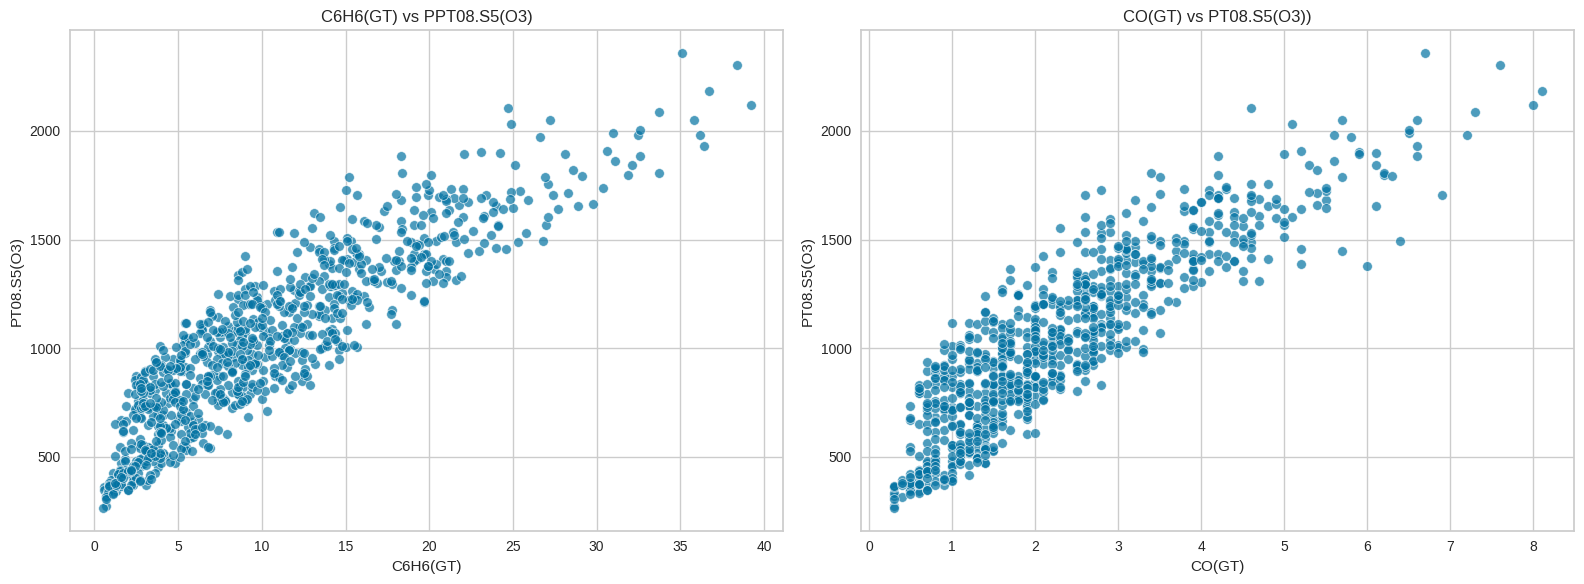

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# C6H6(GT) vs PT08.S5(O3)
sns.scatterplot(ax=axes[0], x='C6H6(GT)', y='PT08.S5(O3)', data=df, alpha=0.7)
axes[0].set_title('C6H6(GT) vs PPT08.S5(O3)')
axes[0].set_xlabel('C6H6(GT)')
axes[0].set_ylabel('PT08.S5(O3)')

# CO(GT) vs PT08.S5(O3)
sns.scatterplot(ax=axes[1], x='CO(GT)', y='PT08.S5(O3)', data=df, alpha=0.7)
axes[1].set_title('CO(GT) vs PT08.S5(O3))')
axes[1].set_xlabel('CO(GT)')
axes[1].set_ylabel('PT08.S5(O3)')

plt.tight_layout()
plt.show()

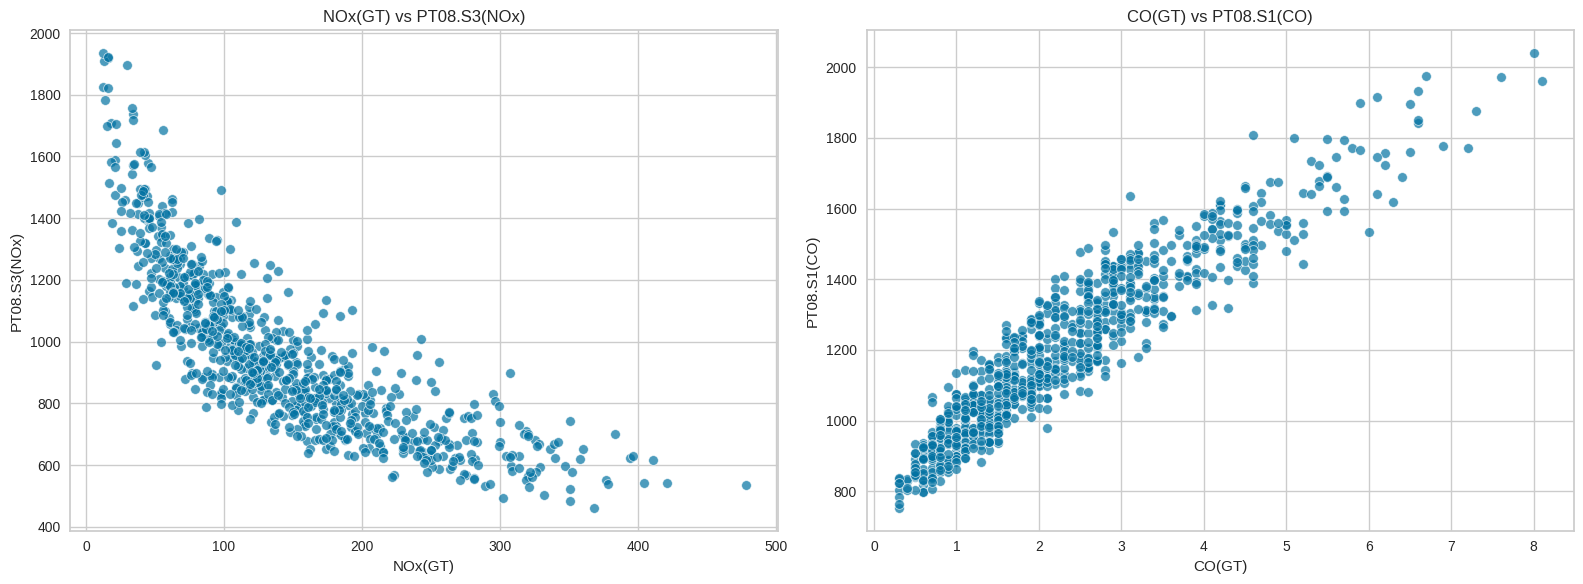

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# NOx(GT) vs PT08.S3(NOx)
sns.scatterplot(ax=axes[0], x='NOx(GT)', y='PT08.S3(NOx)', data=df, alpha=0.7)
axes[0].set_title('NOx(GT) vs PT08.S3(NOx)')
axes[0].set_xlabel('NOx(GT)')
axes[0].set_ylabel('PT08.S3(NOx)')

# CO(GT) vs PT08.S1(CO)
sns.scatterplot(ax=axes[1], x='CO(GT)', y='PT08.S1(CO)', data=df, alpha=0.7)
axes[1].set_title('CO(GT) vs PT08.S1(CO)')
axes[1].set_xlabel('CO(GT)')
axes[1].set_ylabel('PT08.S1(CO)')

plt.tight_layout()
plt.show()

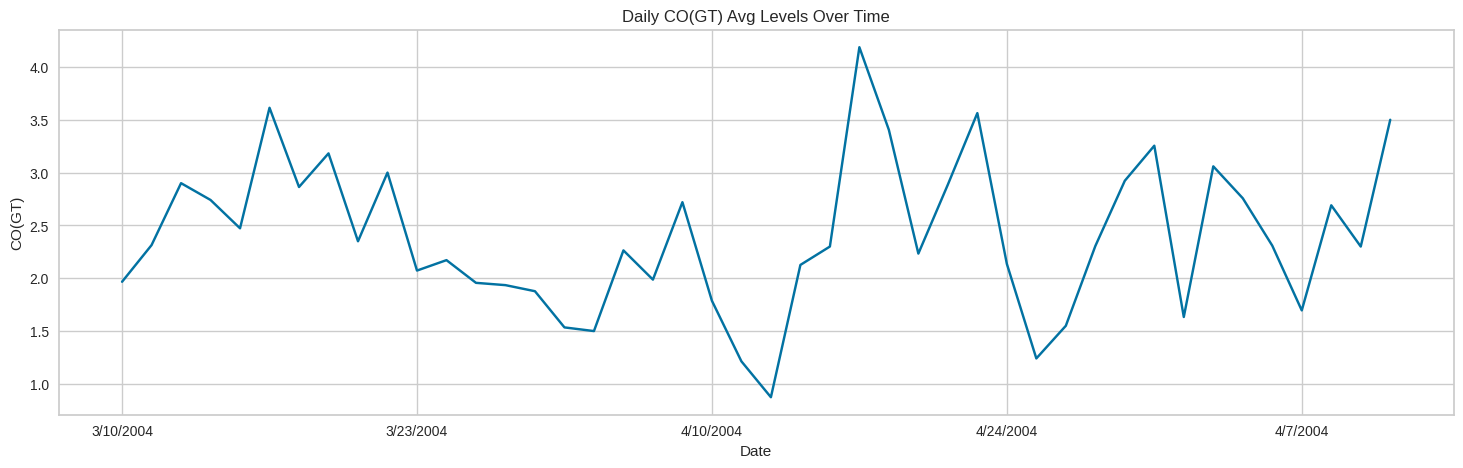

In [26]:
daily_avg = df.groupby('Date')['CO(GT)'].mean()

plt.figure(figsize=(18, 5))
daily_avg.plot(kind='line')
plt.title('Daily CO(GT) Avg Levels Over Time')
plt.xlabel('Date')
plt.ylabel('CO(GT)')
plt.grid(True)
plt.show()

# **5. Data Preprocessing**

## Remove Duplicated Rows & Missing Values

In [27]:
df.drop_duplicates(inplace=True)

In [28]:
df.dropna(inplace=True)

## Feature Engineering

In [29]:
# Create a new feature by combining 'CO(GT)' and 'PT08.S1(CO)'
df['CO_Product'] = df['CO(GT)'] * df['PT08.S1(CO)']
df['CO_Avg'] = (df['CO(GT)'] + df['PT08.S1(CO)']) / 2
df['CO_Ratio'] = df['CO(GT)'] / (df['PT08.S1(CO)'] + 1e-6)

df[['CO_Product', 'CO_Avg', 'CO_Ratio']].describe()

,CO_Product,CO_Avg,CO_Ratio
count,827.000,827.000,827.000
mean,3161.554,605.116,0.002
std,2555.695,121.569,0.001
min,225.900,376.650,0.000
25%,1314.500,509.125,0.001
50%,2426.300,587.300,0.002
75%,4177.600,691.475,0.002
max,16320.000,1024.000,0.004


In [30]:
# Create a new feature by combining 'NMHC(GT)' and 'PT08.S2(NMHC)'
df['NMHC_Product'] = df['NMHC(GT)'] * df['PT08.S2(NMHC)']
df['NMHC_Avg'] = (df['NMHC(GT)'] + df['PT08.S2(NMHC)']) / 2
df['NMHC_Ratio'] = df['NMHC(GT)'] / (df['PT08.S2(NMHC)'] + 1e-6)

df[['NMHC_Product', 'NMHC_Avg', 'NMHC_Ratio']].describe()

,NMHC_Product,NMHC_Avg,NMHC_Ratio
count,827.000,827.000,827.000
mean,271738.914,598.571,0.207
std,310302.632,230.021,0.138
min,3507.000,231.000,0.014
25%,58436.000,416.750,0.101
50%,149332.000,555.500,0.167
75%,348647.000,729.750,0.277
max,1946393.000,1413.000,0.726


In [31]:
# Total Polutan
df['Total_Polutan'] = df[['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']].sum(axis=1)

df['Total_Polutan'].describe()

,Total_Polutan
count,827.000
mean,487.912
std,313.036
min,51.000
25%,249.700
50%,403.000
75%,647.050
max,1739.000


In [32]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Extract temporal components
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour
df['DayOfWeek'] = df['Datetime'].dt.dayofweek  # Monday=0, Sunday=6
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)  # Binary feature: 1 for weekend, 0 for weekday

df[['Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'IsWeekend']].sample(5)

,Year,Month,Day,Hour,DayOfWeek,IsWeekend
510,2004,4,1,0,3,0
689,2004,4,8,11,3,0
2,2004,3,10,20,2,0
790,2004,4,12,16,0,0
832,2004,4,14,10,2,0


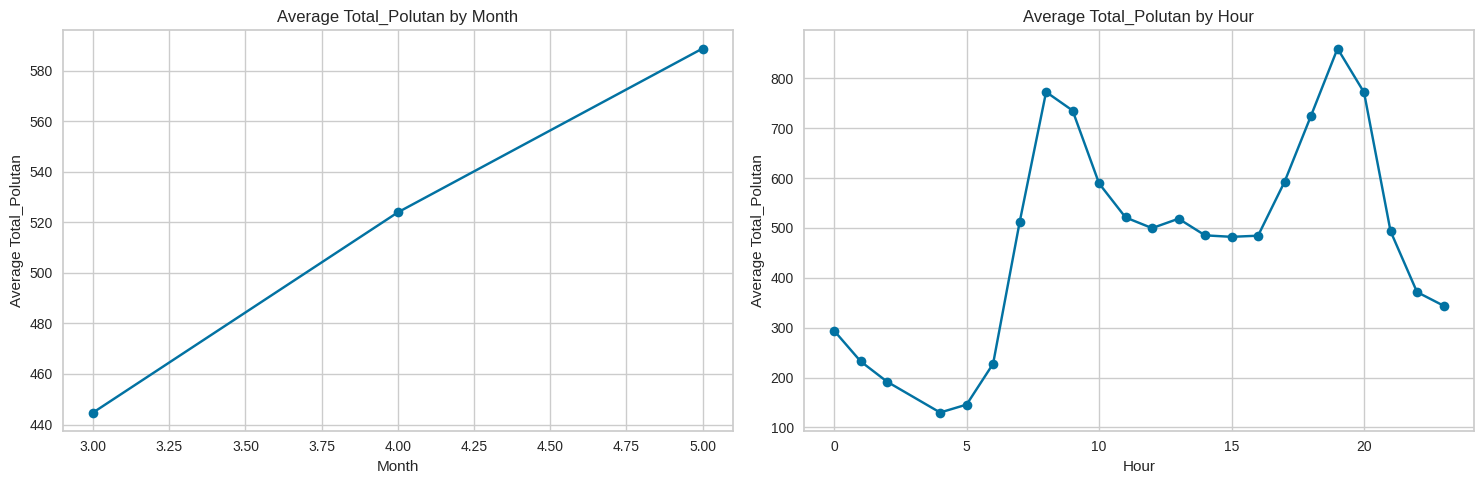

In [33]:
monthly_avg = df.groupby('Month')['Total_Polutan'].mean()
hourly_avg = df.groupby('Hour')['Total_Polutan'].mean()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
monthly_avg.plot(kind='line', marker='o')
plt.title('Average Total_Polutan by Month')
plt.xlabel('Month')
plt.ylabel('Average Total_Polutan')
plt.grid(True)

plt.subplot(1, 2, 2)
hourly_avg.plot(kind='line', marker='o')
plt.title('Average Total_Polutan by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Total_Polutan')
plt.grid(True)

plt.tight_layout()
plt.show()

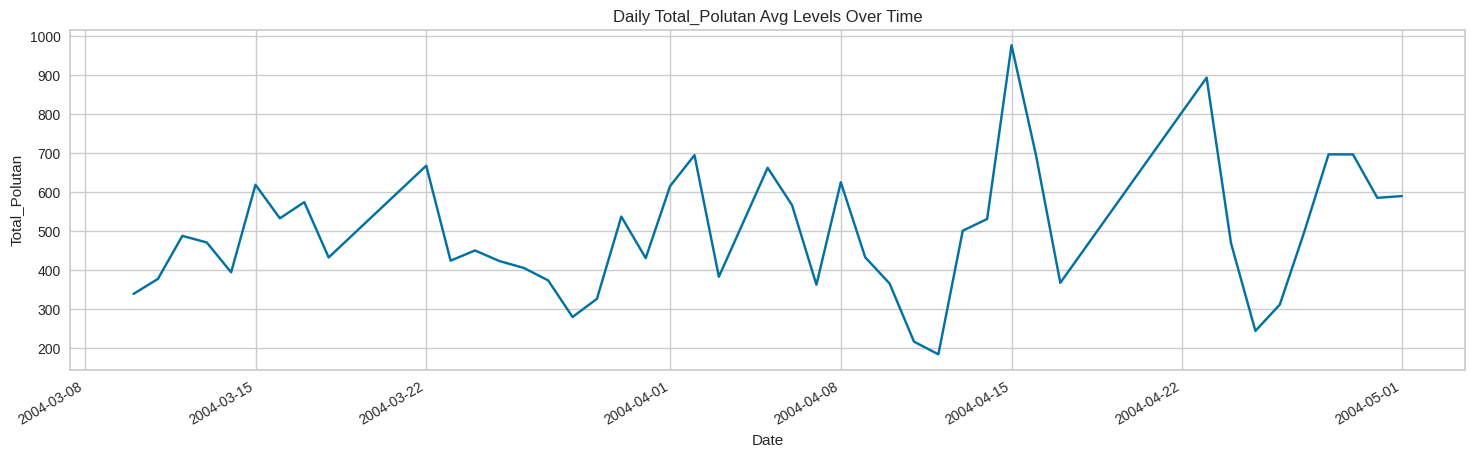

In [34]:
df['Date'] = pd.to_datetime(df['Date'])
daily_avg = df.groupby('Date')['Total_Polutan'].mean()

plt.figure(figsize=(18, 5))
daily_avg.plot(kind='line')
plt.title('Daily Total_Polutan Avg Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Total_Polutan')
plt.grid(True)
plt.show()

## Handle Outliers

In [35]:
# Winsorize
for col in df:
    df[col] = winsorize(df[col], limits=[0.01, 0.01])

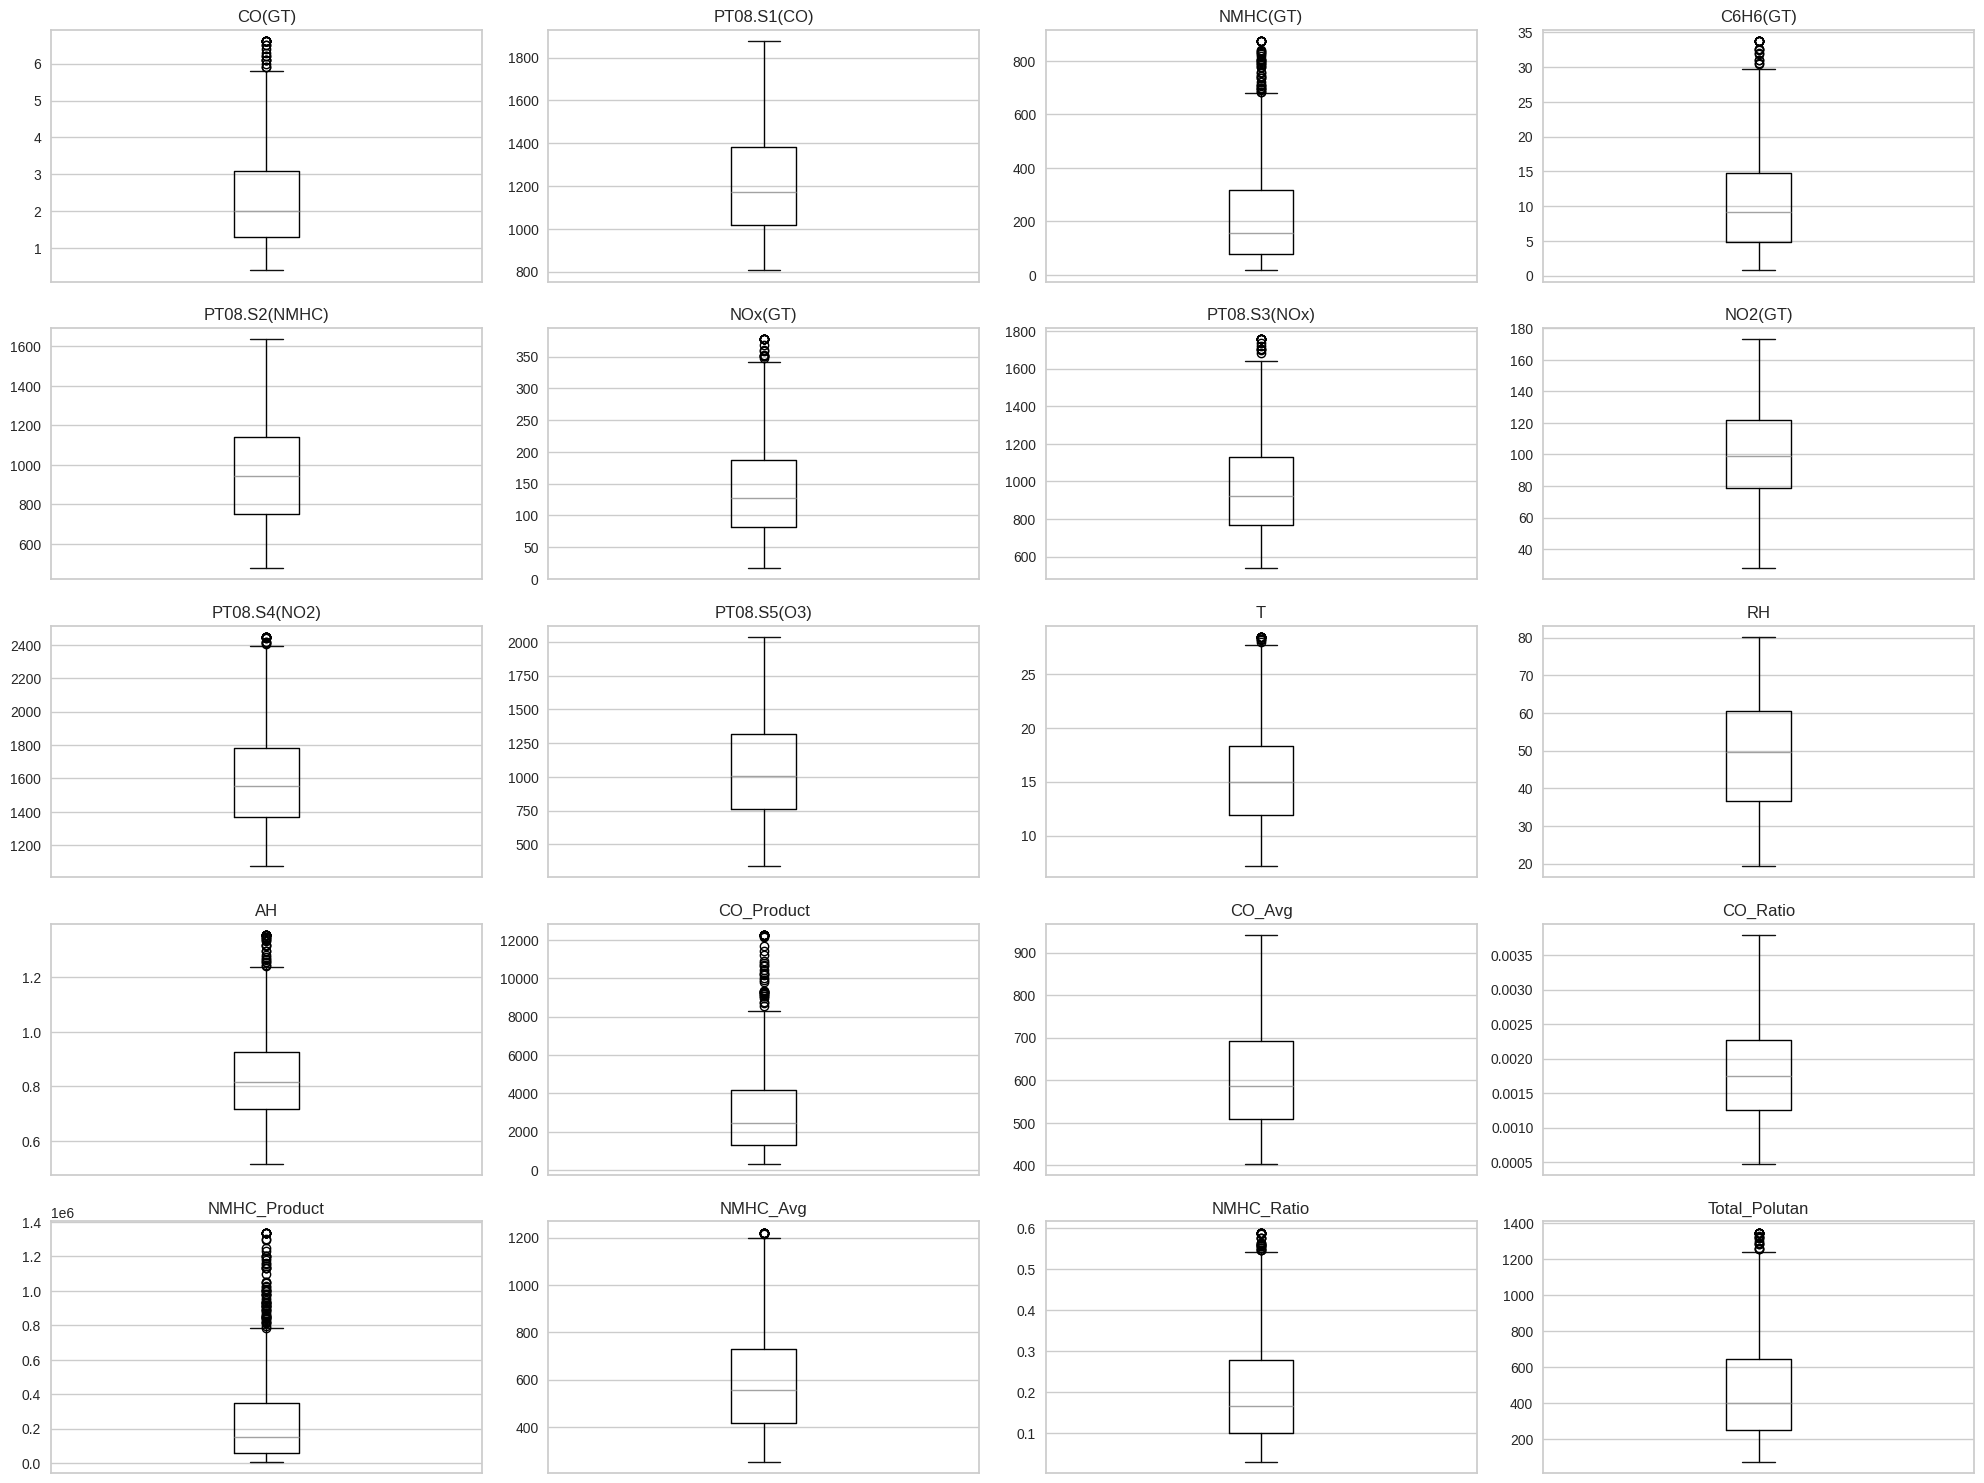

In [36]:
float_features = df.select_dtypes(include='float')

num_features = len(float_features.columns)
num_cols = 4
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(float_features.columns):
    float_features.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xticks([])

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Data Encoding

In [37]:
# Binary Encoding for DayOfWeek
df['DayOfWeek_binary'] = df['DayOfWeek'].apply(lambda x: format(x, '03b'))

binary_columns = ['DayOfWeek_bit0', 'DayOfWeek_bit1', 'DayOfWeek_bit2']
df[binary_columns] = df['DayOfWeek_binary'].apply(lambda x: pd.Series(list(x))).astype(int)

df.drop(['DayOfWeek_binary'], axis=1, inplace=True)
df.drop(['DayOfWeek'], axis=1, inplace=True)

df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,CO_Product,CO_Avg,CO_Ratio,NMHC_Product,NMHC_Avg,NMHC_Ratio,Total_Polutan,Datetime,Year,Month,Day,Hour,IsWeekend,DayOfWeek_bit0,DayOfWeek_bit1,DayOfWeek_bit2
0,2004-03-11,18:00:00,2.600,1360.000,150.000,11.900,1046.000,166.000,1056.000,113.000,1692.000,1268.000,13.600,48.900,0.758,3536.000,681.300,0.002,156900.000,598.000,0.143,443.500,2004-03-11 02:00:00,2004,3,10,18,0,0,1,0
1,2004-03-11,19:00:00,2.000,1292.000,112.000,9.400,955.000,103.000,1174.000,92.000,1559.000,972.000,13.300,47.700,0.726,2584.000,647.000,0.002,106960.000,533.500,0.117,318.400,2004-03-11 02:00:00,2004,3,10,19,0,0,1,0
2,2004-03-11,20:00:00,2.200,1402.000,88.000,9.000,939.000,131.000,1140.000,114.000,1555.000,1074.000,11.900,54.000,0.750,3084.400,702.100,0.002,82632.000,513.500,0.094,344.200,2004-03-11 02:00:00,2004,3,10,20,0,0,1,0
3,2004-03-11,21:00:00,2.200,1376.000,80.000,9.200,948.000,172.000,1092.000,122.000,1584.000,1203.000,11.000,60.000,0.787,3027.200,689.100,0.002,75840.000,514.000,0.084,385.400,2004-03-11 02:00:00,2004,3,10,21,0,0,1,0
4,2004-03-11,22:00:00,1.600,1272.000,51.000,6.500,836.000,131.000,1205.000,116.000,1490.000,1110.000,11.200,59.600,0.789,2035.200,636.800,0.001,42636.000,443.500,0.061,306.100,2004-03-11 02:00:00,2004,3,10,22,0,0,1,0


In [38]:
# Label Encoding for Time
le = LabelEncoder()
df['Time'] = le.fit_transform(df['Time'])

In [39]:
# Cyclic Encoding for Hour & Month
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

## Data Binning

In [40]:
# Binning for CO(GT)
bins_co = [0, 2, 5, 12]
labels_co = ['Low', 'Medium', 'High']
df['CO_Category'] = pd.cut(df['CO(GT)'], bins=bins_co, labels=labels_co)

# Binning for T (Temperature)
df['Temperature_Category'] = pd.qcut(df['T'], q=3, labels=['Cold', 'Moderate', 'Hot'])

# Binning for NO2(GT)
bins_no2 = [0, 100, 200, 340]
labels_no2 = ['Low', 'Medium', 'High']
df['NO2_Category'] = pd.cut(df['NO2(GT)'], bins=bins_no2, labels=labels_no2)

# Binning for Hour (Time of Day)
def categorize_hour(hour):
    if hour < 6:
        return 'Night'
    elif hour < 12:
        return 'Morning'
    elif hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df['Time_of_Day'] = df['Hour'].apply(lambda x: categorize_hour(x))

# Binning for C6H6(GT)
bins_c6h6 = [0, 10, 30, 64]
labels_c6h6 = ['Low', 'Medium', 'High']
df['C6H6_Category'] = pd.cut(df['C6H6(GT)'], bins=bins_c6h6, labels=labels_c6h6)

df[['CO_Category', 'Temperature_Category', 'NO2_Category', 'Time_of_Day', 'C6H6_Category']].sample(5)

,CO_Category,Temperature_Category,NO2_Category,Time_of_Day,C6H6_Category
510,Low,Cold,Low,Night,Low
549,Medium,Hot,Medium,Afternoon,Medium
166,Medium,Hot,Medium,Afternoon,Medium
746,Medium,Moderate,Medium,Evening,Medium
1214,Medium,Hot,Medium,Morning,Medium


In [41]:
df['Time_of_Day'].value_counts()

,count
Time_of_Day,
Evening,228
Morning,222
Afternoon,215
Night,162


In [42]:
# Label encoding for each binned column
label_cols = ['CO_Category', 'Temperature_Category', 'NO2_Category', 'Time_of_Day', 'C6H6_Category']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])

df[['CO_Category', 'Temperature_Category', 'NO2_Category', 'Time_of_Day', 'C6H6_Category']].sample(5)

,CO_Category,Temperature_Category,NO2_Category,Time_of_Day,C6H6_Category
56,1,0,0,3,1
544,2,2,1,2,2
291,2,2,1,1,2
103,1,2,0,3,1
1175,2,1,1,0,2


In [43]:
columns_to_drop = ['Datetime', 'Date', 'Time', 'Month', 'Hour']
df.drop(columns=columns_to_drop, inplace=True)

df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,CO_Product,CO_Avg,CO_Ratio,NMHC_Product,NMHC_Avg,NMHC_Ratio,Total_Polutan,Year,Day,IsWeekend,DayOfWeek_bit0,DayOfWeek_bit1,DayOfWeek_bit2,Hour_sin,Hour_cos,Month_sin,Month_cos,CO_Category,Temperature_Category,NO2_Category,Time_of_Day,C6H6_Category
count,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000
mean,2.348,1207.341,229.693,10.746,965.674,143.227,962.438,100.195,1599.958,1044.925,15.599,49.056,0.832,3145.502,604.850,0.002,268966.831,597.845,0.206,486.376,2004.000,18.214,0.231,0.389,0.421,0.444,-0.057,-0.035,0.927,-0.272,1.393,0.998,0.485,1.400,1.409
std,1.385,239.361,203.329,7.327,264.634,80.812,261.575,31.077,298.448,396.237,4.791,15.207,0.176,2484.175,120.342,0.001,298384.849,227.262,0.137,307.209,0.000,8.777,0.422,0.488,0.494,0.497,0.701,0.711,0.067,0.249,0.586,0.819,0.500,1.074,0.534
min,0.400,807.000,18.000,0.800,478.000,17.000,539.000,28.000,1076.000,341.000,7.200,19.400,0.517,321.200,403.850,0.000,9420.000,254.000,0.031,76.400,2004.000,1.000,0.000,0.000,0.000,0.000,-1.000,-1.000,0.866,-0.500,0.000,0.000,0.000,0.000,0.000
25%,1.300,1017.000,77.000,4.800,754.000,81.000,769.000,78.500,1369.500,760.000,11.900,36.700,0.719,1314.500,509.125,0.001,58436.000,416.750,0.101,249.700,2004.000,11.500,0.000,0.000,0.000,0.000,-0.707,-0.707,0.866,-0.500,1.000,0.000,0.000,0.000,1.000
50%,2.000,1172.000,157.000,9.100,944.000,128.000,920.000,99.000,1556.000,1009.000,15.000,49.600,0.818,2426.300,587.300,0.002,149332.000,555.500,0.167,403.000,2004.000,17.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.866,-0.500,1.000,1.000,0.000,1.000,1.000
75%,3.100,1380.000,318.500,14.800,1142.500,187.000,1131.000,122.000,1783.500,1320.000,18.300,60.550,0.927,4177.600,691.475,0.002,348647.000,729.750,0.277,647.050,2004.000,26.000,0.000,1.000,1.000,1.000,0.500,0.707,1.000,0.000,2.000,2.000,1.000,2.000,2.000
max,6.600,1875.000,872.000,33.700,1636.000,377.000,1756.000,173.000,2446.000,2034.000,28.400,80.100,1.355,12254.400,941.150,0.004,1336300.000,1219.500,0.588,1347.100,2004.000,31.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,2.000,2.000,1.000,3.000,2.000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 827 entries, 0 to 1230
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CO(GT)                827 non-null    float64
 1   PT08.S1(CO)           827 non-null    float64
 2   NMHC(GT)              827 non-null    float64
 3   C6H6(GT)              827 non-null    float64
 4   PT08.S2(NMHC)         827 non-null    float64
 5   NOx(GT)               827 non-null    float64
 6   PT08.S3(NOx)          827 non-null    float64
 7   NO2(GT)               827 non-null    float64
 8   PT08.S4(NO2)          827 non-null    float64
 9   PT08.S5(O3)           827 non-null    float64
 10  T                     827 non-null    float64
 11  RH                    827 non-null    float64
 12  AH                    827 non-null    float64
 13  CO_Product            827 non-null    float64
 14  CO_Avg                827 non-null    float64
 15  CO_Ratio              827 n

## Standardize Features

In [45]:
df_scaled = df.copy()

X = df_scaled.select_dtypes(include=['float64', 'int64']).columns
exclude_columns = ['IsWeekend', 'DayOfWeek_bit0', 'DayOfWeek_bit1', 'DayOfWeek_bit2', 'CO_Category', 'Temperature_Category', 'C6H6_Category']
X = [col for col in X if col not in exclude_columns]

scaler = StandardScaler()

df_scaled[X] = scaler.fit_transform(df_scaled[X])

df_scaled[X].head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,CO_Product,CO_Avg,CO_Ratio,NMHC_Product,NMHC_Avg,NMHC_Ratio,Total_Polutan,Hour_sin,Hour_cos,Month_sin,Month_cos,NO2_Category,Time_of_Day
0,0.182,0.638,-0.392,0.158,0.304,0.282,0.358,0.412,0.309,0.563,-0.417,-0.010,-0.421,0.157,0.636,0.128,-0.376,0.001,-0.461,-0.140,-1.347,0.049,1.093,1.093,1.031,-0.373
1,-0.251,0.354,-0.579,-0.184,-0.040,-0.498,0.809,-0.264,-0.137,-0.184,-0.480,-0.089,-0.604,-0.226,0.350,-0.357,-0.543,-0.283,-0.653,-0.547,-1.298,0.413,1.093,1.093,-0.970,-0.373
2,-0.107,0.814,-0.697,-0.238,-0.101,-0.151,0.679,0.444,-0.151,0.073,-0.772,0.325,-0.464,-0.025,0.809,-0.329,-0.625,-0.371,-0.825,-0.463,-1.156,0.752,1.093,1.093,1.031,-0.373
3,-0.107,0.705,-0.737,-0.211,-0.067,0.356,0.496,0.702,-0.054,0.399,-0.960,0.720,-0.257,-0.048,0.701,-0.289,-0.648,-0.369,-0.893,-0.329,-0.929,1.043,1.093,1.093,1.031,-0.373
4,-0.540,0.270,-0.879,-0.580,-0.490,-0.151,0.928,0.509,-0.369,0.164,-0.919,0.694,-0.245,-0.447,0.266,-0.745,-0.759,-0.680,-1.065,-0.587,-0.633,1.267,1.093,1.093,1.031,-0.373


In [46]:
df_scaled.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,CO_Product,CO_Avg,CO_Ratio,NMHC_Product,NMHC_Avg,NMHC_Ratio,Total_Polutan,Year,Day,IsWeekend,DayOfWeek_bit0,DayOfWeek_bit1,DayOfWeek_bit2,Hour_sin,Hour_cos,Month_sin,Month_cos,CO_Category,Temperature_Category,NO2_Category,Time_of_Day,C6H6_Category
count,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000
mean,0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,2004.000,18.214,0.231,0.389,0.421,0.444,0.000,0.000,0.000,0.000,1.393,0.998,0.000,0.000,1.409
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,0.000,8.777,0.422,0.488,0.494,0.497,1.001,1.001,1.001,1.001,0.586,0.819,1.001,1.001,0.534
min,-1.407,-1.674,-1.042,-1.358,-1.844,-1.563,-1.620,-2.324,-1.757,-1.778,-1.754,-1.951,-1.789,-1.138,-1.671,-1.784,-0.870,-1.514,-1.282,-1.335,2004.000,1.000,0.000,0.000,0.000,0.000,-1.347,-1.358,-0.915,-0.915,0.000,0.000,-0.970,-1.305,0.000
25%,-0.757,-0.796,-0.751,-0.812,-0.800,-0.770,-0.740,-0.699,-0.773,-0.720,-0.772,-0.813,-0.642,-0.738,-0.796,-0.755,-0.706,-0.797,-0.770,-0.771,2004.000,11.500,0.000,0.000,0.000,0.000,-0.929,-0.946,-0.915,-0.915,1.000,0.000,-0.970,-1.305,1.000
50%,-0.251,-0.148,-0.358,-0.225,-0.082,-0.189,-0.162,-0.038,-0.147,-0.091,-0.125,0.036,-0.080,-0.290,-0.146,-0.091,-0.401,-0.186,-0.290,-0.272,2004.000,17.000,0.000,0.000,0.000,0.000,0.081,0.049,-0.915,-0.915,1.000,1.000,-0.970,-0.373,1.000
75%,0.544,0.722,0.437,0.554,0.669,0.542,0.645,0.702,0.615,0.695,0.564,0.756,0.543,0.416,0.720,0.611,0.267,0.581,0.519,0.523,2004.000,26.000,0.000,1.000,1.000,1.000,0.795,1.043,1.093,1.093,2.000,2.000,1.031,0.559,2.000
max,3.072,2.791,3.161,3.135,2.535,2.895,3.036,2.344,2.837,2.498,2.673,2.043,2.970,3.669,2.796,2.634,3.579,2.737,2.792,2.803,2004.000,31.000,1.000,1.000,1.000,1.000,1.509,1.455,1.093,1.093,2.000,2.000,1.031,1.491,2.000


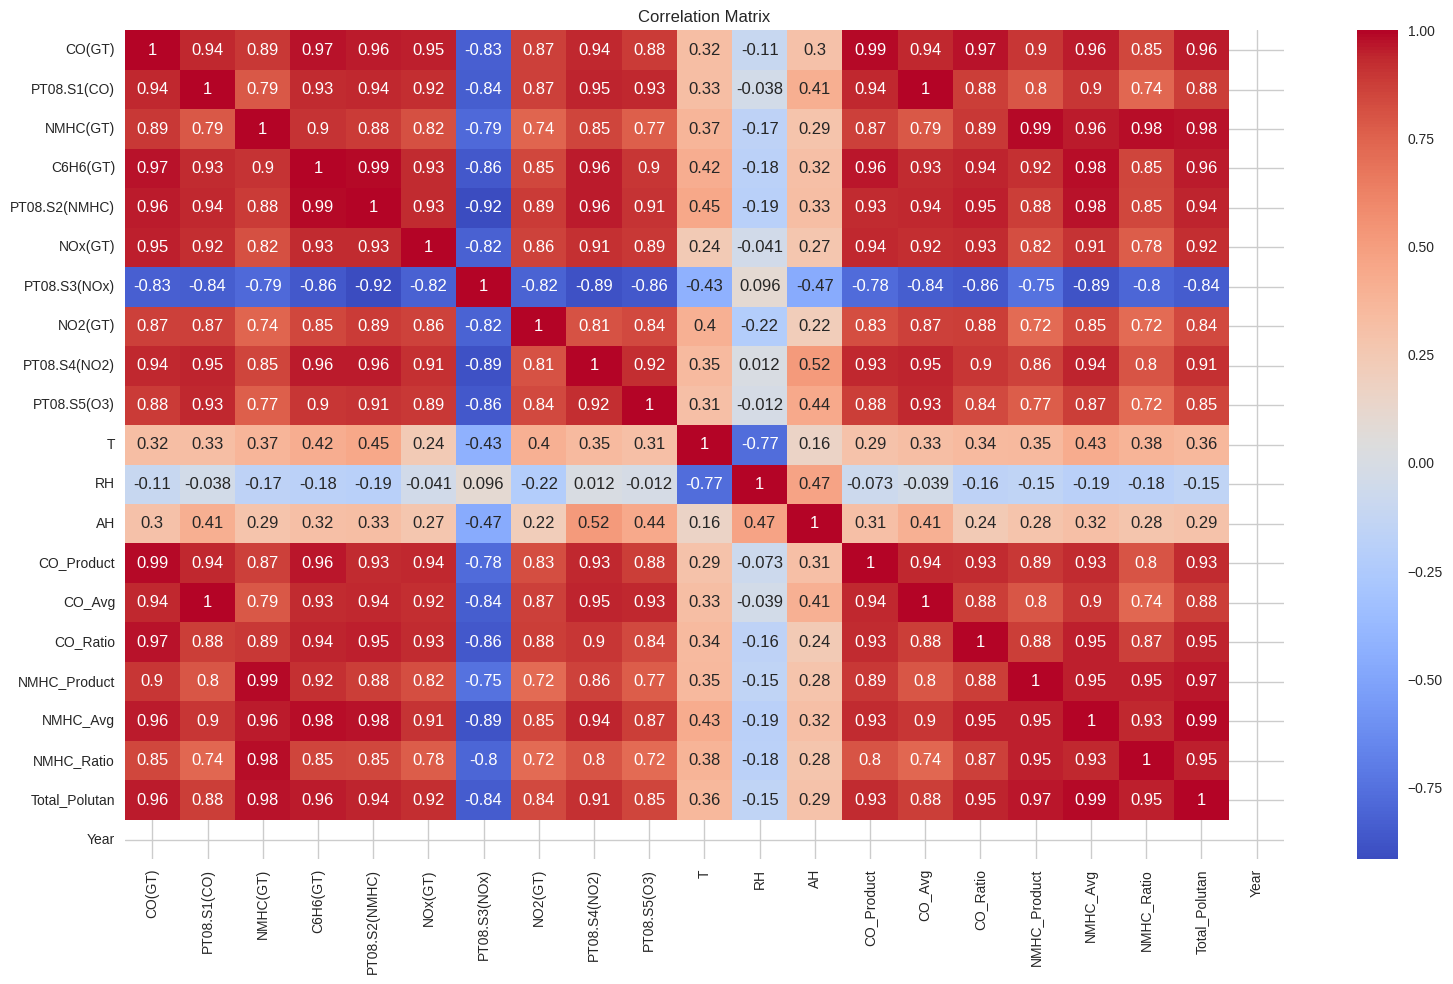

In [47]:
excluded_columns = list(df_scaled.columns[-14:])
df_subset = df_scaled.drop(columns=excluded_columns)

plt.figure(figsize=(16, 10))
sns.heatmap(df_subset.corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## PCA

Explained Variance Ratio by Principal Components:
[0.77686592 0.09537274]


Text(0.5, 1.0, 'PCA Result')

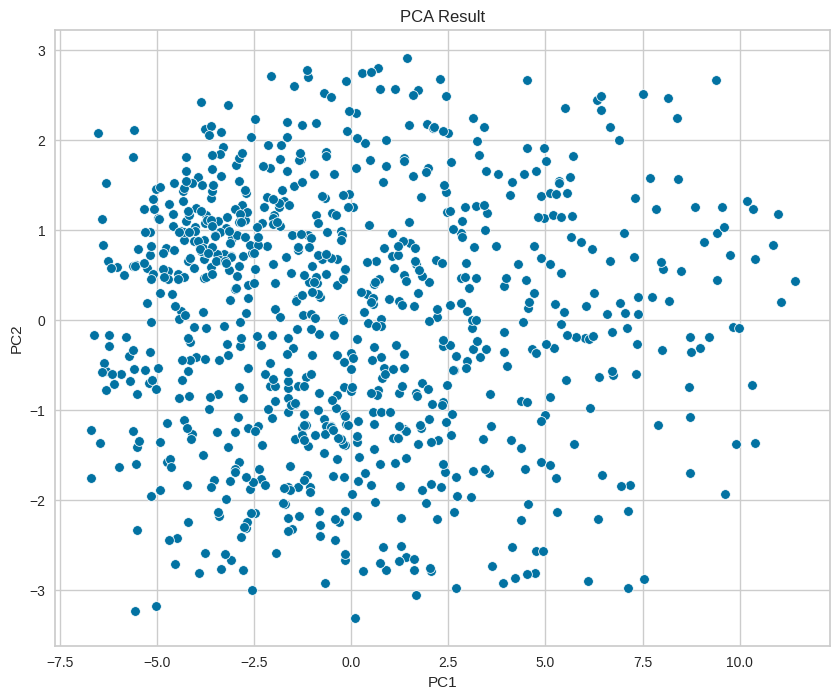

In [48]:
# Initialize PCA for 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_subset)

# Create a DataFrame for the principal components
x_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Display the explained variance ratio
print('Explained Variance Ratio by Principal Components:')
print(pca.explained_variance_ratio_)

# visualize pca
plt.figure(figsize=(10, 8))
sns.scatterplot(data=x_pca, x='PC1', y='PC2')
plt.title('PCA Result')

# **6. Clustering Model Building**

## **Clustering Model Building & Evaluation**

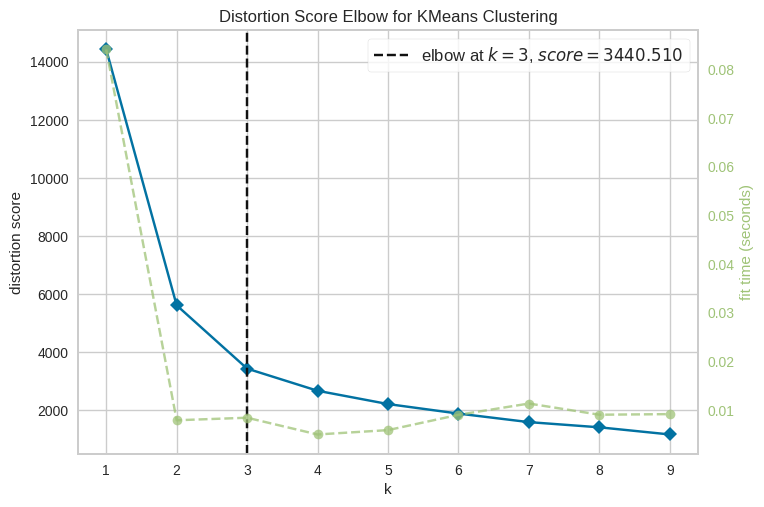

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

visualizer.fit(x_pca)
visualizer.show()

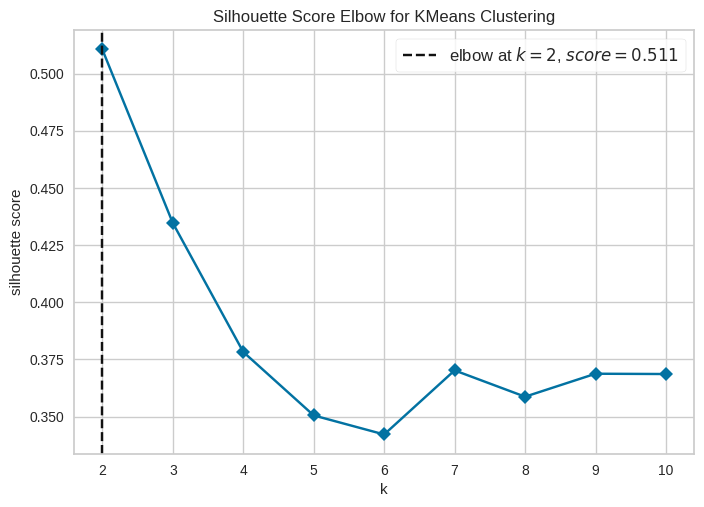

In [50]:
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=False)

visualizer.fit(x_pca)
visualizer.show()

optimal_k = visualizer.elbow_value_
best_score_k = visualizer.elbow_score_

In [51]:
def dbscan_silhouette_analysis(x_pca1, eps_values, min_samples=5):
    silhouette_scores = []
    num_clusters_list = []

    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(x_pca1)

        num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        num_clusters_list.append(num_clusters)

        if num_clusters > 1:
            sil_score = silhouette_score(x_pca1, dbscan_labels)
            silhouette_scores.append(sil_score)
        else:
            silhouette_scores.append(None)

    # Filter valid silhouette scores
    valid_scores = [(eps, score) for eps, score in zip(eps_values, silhouette_scores) if score is not None]
    best_eps, best_score = None, None
    if valid_scores:
        best_eps, best_score = max(valid_scores, key=lambda x: x[1])

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(eps_values, [s if s is not None else 0 for s in silhouette_scores], marker='o', label="Silhouette Score")
    plt.xticks(eps_values)
    plt.xlabel("eps (DBSCAN parameter)")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Score for DBSCAN Clustering")
    if valid_scores:
        plt.axvline(x=best_eps, linestyle='--', color='black', label=f"Best eps = {best_eps}, score = {best_score:.3f}")
    plt.legend()
    plt.grid(True)
    plt.show()

    return best_eps, best_score, silhouette_scores

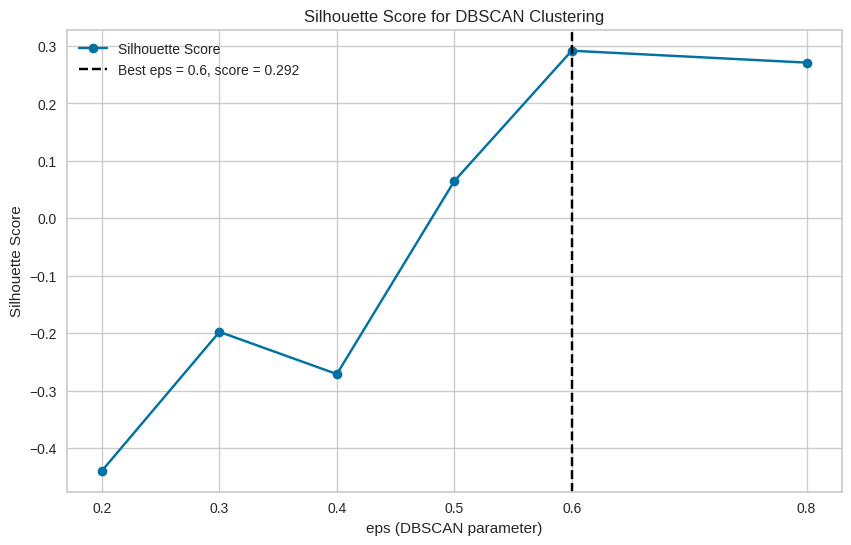

In [52]:
eps_values = [0.2, 0.3, 0.4, 0.5, 0.6, 0.8]

best_eps, best_score, silhouette_scores = dbscan_silhouette_analysis(x_pca, eps_values)

## **Feature Selection**

In [53]:
selected_features = ['NMHC_Ratio', 'NMHC_Product', 'CO_Ratio', 'CO_Product', 'Total_Polutan']
x = df_scaled[selected_features]

Explained Variance Ratio by Principal Components:
[0.92985277 0.04638113]


Text(0.5, 1.0, 'PCA Result')

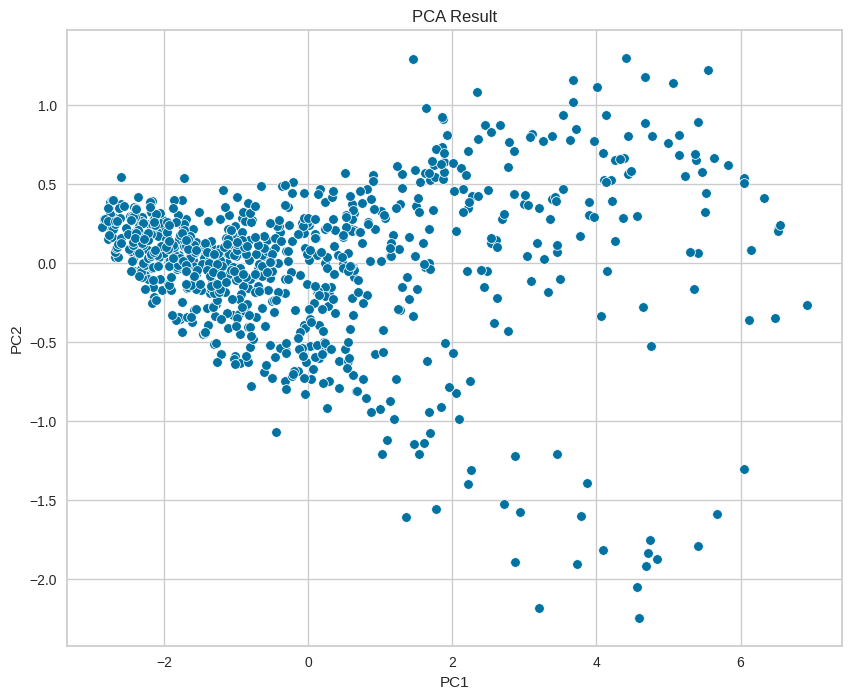

In [54]:
principal_components = pca.fit_transform(x)
x_pca1 = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

print('Explained Variance Ratio by Principal Components:')
print(pca.explained_variance_ratio_)

# visualize pca
plt.figure(figsize=(10, 8))
sns.scatterplot(data=x_pca1, x='PC1', y='PC2')
plt.title('PCA Result')

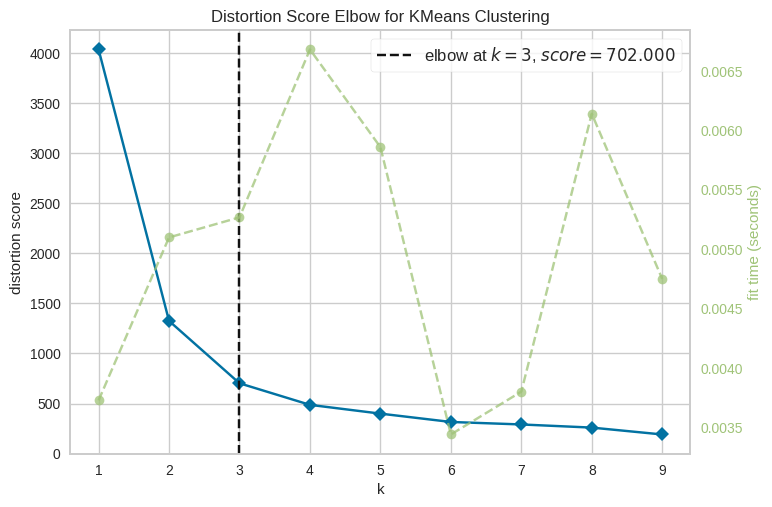

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

visualizer.fit(x_pca1)
visualizer.show()

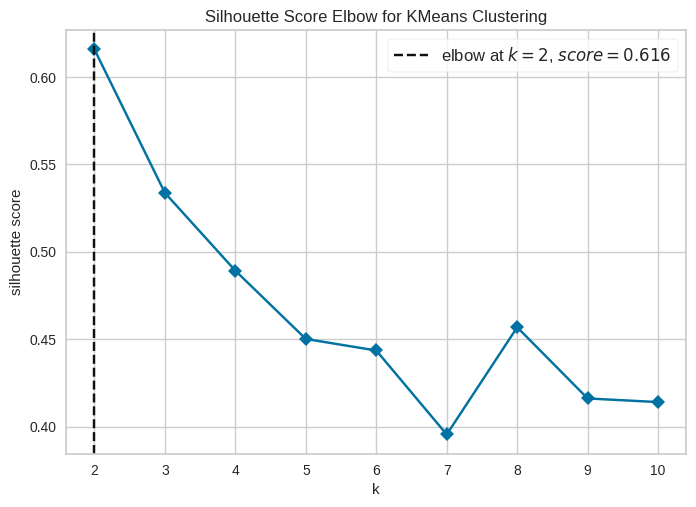

In [56]:
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=False)

visualizer.fit(x_pca1)
visualizer.show()

optimal_k1 = visualizer.elbow_value_
best_score_k1 = visualizer.elbow_score_

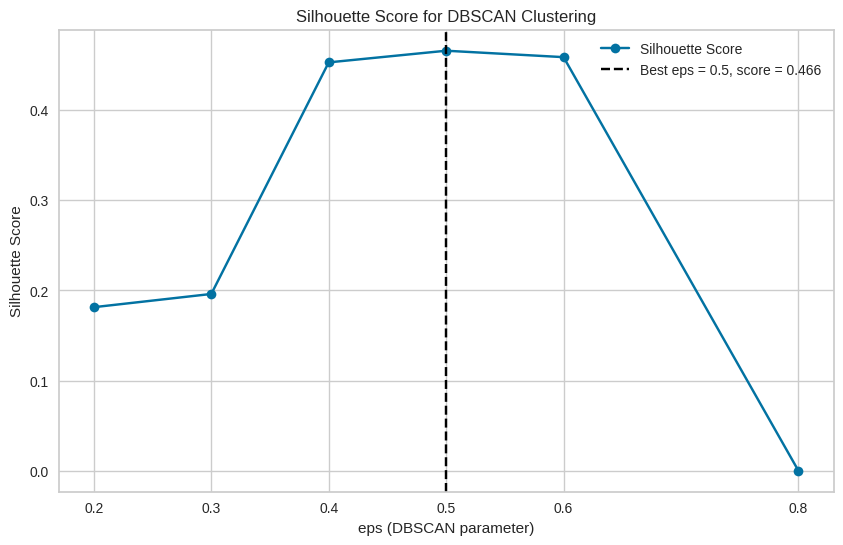

In [57]:
eps_values = [0.2, 0.3, 0.4, 0.5, 0.6, 0.8]

best_eps, best_score, silhouette_scores = dbscan_silhouette_analysis(x_pca1, eps_values)

## **Cluster Visualization & Analysis**

### Before Feature Selection

In [58]:
dbscan = DBSCAN(eps=0.6, min_samples=5)
clusters = dbscan.fit_predict(x_pca)

X_dbscan = x_pca.copy()
X_dbscan['Cluster'] = clusters
X_dbscan['Cluster'].value_counts()

,count
Cluster,
0,767
-1,42
1,7
3,6
2,5


**DBSCAN RESULT:**

Extreme imbalance (highly imbalanced)

- Cluster 0: 767 samples
- Cluster 1: only 7 samples
- Noise (-1): only 42 samples
- Cluster 2: only 5 samples
- Cluster 3: only 6 samples

The clusters formed are unrepresentative as almost all the data falls into just one cluster (cluster 0), thus providing no meaningful insight into the patterns/clustering in the data.

In [59]:
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(x_pca)

X_kmeans = x_pca.copy()
X_kmeans['Cluster'] = clusters
X_kmeans['Cluster'].value_counts()

,count
Cluster,
1,529
0,298


**K-MEANS RESULT**:

From the clustering results using K-Means with k=2 (n_clusters=2), we see better results than the previous DBSCAN

The cluster distribution is more balanced:
- Cluster 1: 529 samples
- Cluster 0: 298 samples

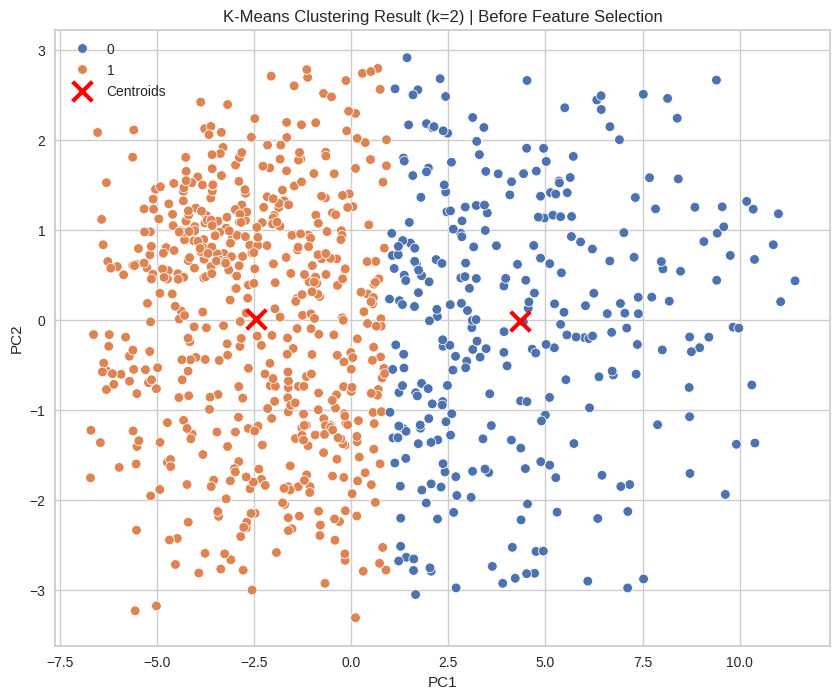

In [60]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=X_kmeans, x='PC1', y='PC2', hue='Cluster', palette='deep')
plt.title('K-Means Clustering Result (k=2) | Before Feature Selection')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.legend()
plt.grid(True)
plt.show()

In [61]:
print(f"Optimal k: {optimal_k}")
print(f"Best silhouette score: {best_score_k}")

Optimal k: 2
Best silhouette score: 0.5105229323970318


**NOTE:**

The silhouette score from the KMeans clustering is 0.51, which is below 0.55. This indicates poor cluster separation.

### After Feature Selection

In [62]:
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit_predict(x_pca1)

X_kmeans1 = x_pca1.copy()
X_kmeans1['Cluster'] = clusters
X_kmeans1['Cluster'].value_counts()

,count
Cluster,
1,611
0,216


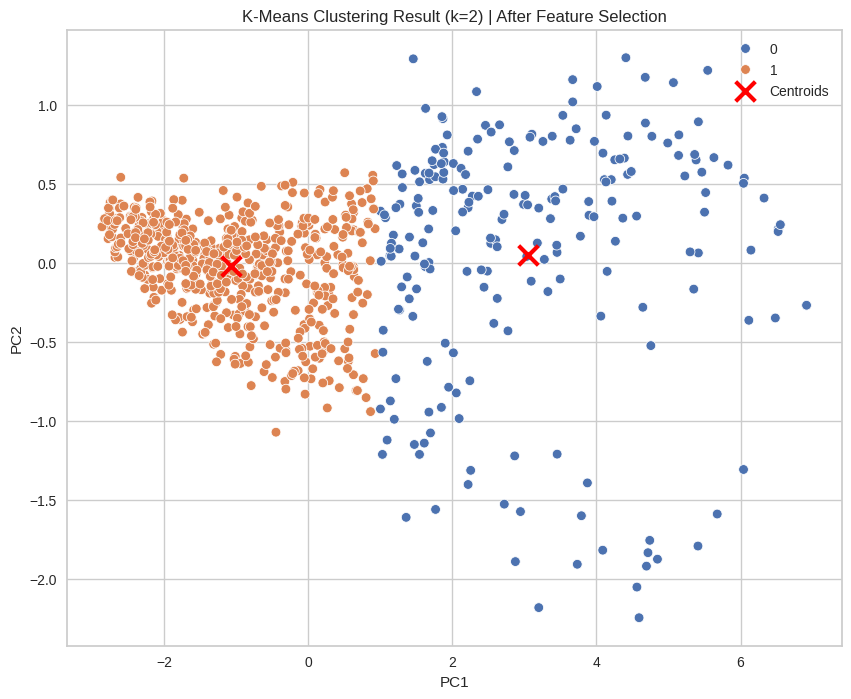

In [63]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=X_kmeans1, x='PC1', y='PC2', hue='Cluster', palette='deep')
plt.title('K-Means Clustering Result (k=2) | After Feature Selection')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.legend()
plt.grid(True)
plt.show()

In [64]:
print(f"Optimal k: {optimal_k1}")
print(f"Best silhouette score: {best_score_k1}")

Optimal k: 2
Best silhouette score: 0.6157837670018184


**INSIGHT:**

The silhoutte score of the clustering after feature selection is 0.61. Which is where the score results are above 0.55 which indicates a fairly good cluster separation.

## **Interpretation of Cluster Results**

1. Cluster 1:
2. Cluster 2:

# **7. Exporting Data**

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 827 entries, 0 to 1230
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CO(GT)                827 non-null    float64
 1   PT08.S1(CO)           827 non-null    float64
 2   NMHC(GT)              827 non-null    float64
 3   C6H6(GT)              827 non-null    float64
 4   PT08.S2(NMHC)         827 non-null    float64
 5   NOx(GT)               827 non-null    float64
 6   PT08.S3(NOx)          827 non-null    float64
 7   NO2(GT)               827 non-null    float64
 8   PT08.S4(NO2)          827 non-null    float64
 9   PT08.S5(O3)           827 non-null    float64
 10  T                     827 non-null    float64
 11  RH                    827 non-null    float64
 12  AH                    827 non-null    float64
 13  CO_Product            827 non-null    float64
 14  CO_Avg                827 non-null    float64
 15  CO_Ratio              827 n

In [66]:
df['Cluster'] = X_kmeans1['Cluster'].values

In [67]:
df['Cluster'].value_counts()

,count
Cluster,
1,611
0,216


In [68]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,CO_Product,CO_Avg,CO_Ratio,NMHC_Product,NMHC_Avg,NMHC_Ratio,Total_Polutan,Year,Day,IsWeekend,DayOfWeek_bit0,DayOfWeek_bit1,DayOfWeek_bit2,Hour_sin,Hour_cos,Month_sin,Month_cos,CO_Category,Temperature_Category,NO2_Category,Time_of_Day,C6H6_Category,Cluster
count,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000,827.000
mean,2.348,1207.341,229.693,10.746,965.674,143.227,962.438,100.195,1599.958,1044.925,15.599,49.056,0.832,3145.502,604.850,0.002,268966.831,597.845,0.206,486.376,2004.000,18.214,0.231,0.389,0.421,0.444,-0.057,-0.035,0.927,-0.272,1.393,0.998,0.485,1.400,1.409,0.739
std,1.385,239.361,203.329,7.327,264.634,80.812,261.575,31.077,298.448,396.237,4.791,15.207,0.176,2484.175,120.342,0.001,298384.849,227.262,0.137,307.209,0.000,8.777,0.422,0.488,0.494,0.497,0.701,0.711,0.067,0.249,0.586,0.819,0.500,1.074,0.534,0.440
min,0.400,807.000,18.000,0.800,478.000,17.000,539.000,28.000,1076.000,341.000,7.200,19.400,0.517,321.200,403.850,0.000,9420.000,254.000,0.031,76.400,2004.000,1.000,0.000,0.000,0.000,0.000,-1.000,-1.000,0.866,-0.500,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.300,1017.000,77.000,4.800,754.000,81.000,769.000,78.500,1369.500,760.000,11.900,36.700,0.719,1314.500,509.125,0.001,58436.000,416.750,0.101,249.700,2004.000,11.500,0.000,0.000,0.000,0.000,-0.707,-0.707,0.866,-0.500,1.000,0.000,0.000,0.000,1.000,0.000
50%,2.000,1172.000,157.000,9.100,944.000,128.000,920.000,99.000,1556.000,1009.000,15.000,49.600,0.818,2426.300,587.300,0.002,149332.000,555.500,0.167,403.000,2004.000,17.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.866,-0.500,1.000,1.000,0.000,1.000,1.000,1.000
75%,3.100,1380.000,318.500,14.800,1142.500,187.000,1131.000,122.000,1783.500,1320.000,18.300,60.550,0.927,4177.600,691.475,0.002,348647.000,729.750,0.277,647.050,2004.000,26.000,0.000,1.000,1.000,1.000,0.500,0.707,1.000,0.000,2.000,2.000,1.000,2.000,2.000,1.000
max,6.600,1875.000,872.000,33.700,1636.000,377.000,1756.000,173.000,2446.000,2034.000,28.400,80.100,1.355,12254.400,941.150,0.004,1336300.000,1219.500,0.588,1347.100,2004.000,31.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,2.000,2.000,1.000,3.000,2.000,1.000


In [69]:
df.isna().sum()

,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0
PT08.S4(NO2),0
PT08.S5(O3),0


In [70]:
# Export
df.to_csv('/content/drive/MyDrive/Colab Notebooks/df_cluster.csv', index=False)